In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('amazon_cells_labelled.txt',header=None, names=['message','is_positive'])

In [3]:
df.head()

,message,is_positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df.isnull().values.any()

False

In [5]:
keywords = ['Good', 'Bad', 'Excellent', 'Great', 'Best', 'Love', 'Loved', 'Happy', 
            'Nice', 'Easy', 'Satisfied', 'Very well', 'Broke', 'Broken', 'disappointment', 'Disappointing', 'Not', 'Recommend']

for key in keywords:
    df[str(key)] = df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

Here we're extracting features to use for our Naive Bayes Bournelli Model using keywords. These keywords we will use in the model to predict if the review is positive or negative.

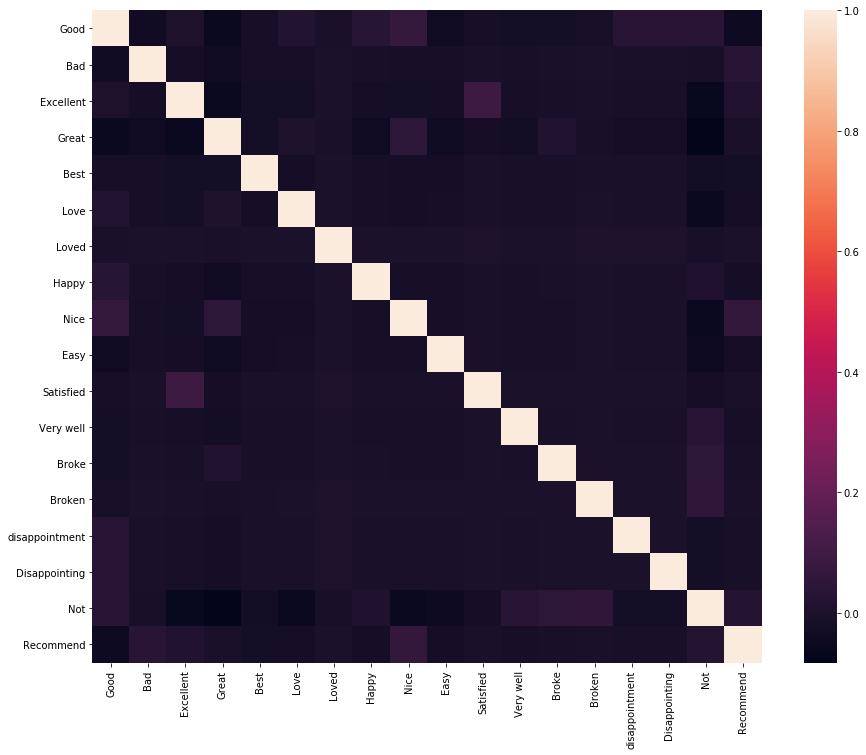

In [11]:
#Doing a heat map of our independent variables
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df[keywords].corr())
plt.show()

In [7]:
#Setting outcome target and independent variables
data = df[keywords]
target = df['is_positive']

#Running Naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 246


In [9]:
#Looking at flase negatives
df['y_pred'] = y_pred
df.loc[(df['is_positive']==1) & (df['y_pred'] ==False)]

,message,is_positive,Good,Bad,Excellent,Great,Best,Love,Loved,Happy,...,Easy,Satisfied,Very well,Broke,Broken,disappointment,Disappointing,Not,Recommend,y_pred
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
11,He was very impressed when going from the orig...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
23,I have yet to run this new battery below two b...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
31,This product is ideal for people like me whose...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
34,Car charger as well as AC charger are included...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
45,It has all the features I want,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
48,This case seems well made.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
51,good protection and does not make phone too bu...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
52,A usable keyboard actually turns a PDA into a ...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
53,This phone is pretty sturdy and I've never had...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [10]:
#Looking at false positives
df.loc[(df['is_positive']==0) & (df['y_pred'] ==True)]

,message,is_positive,Good,Bad,Excellent,Great,Best,Love,Loved,Happy,...,Easy,Satisfied,Very well,Broke,Broken,disappointment,Disappointing,Not,Recommend,y_pred
84,"This item worked great, but it broke after 6 m...",0,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
228,"I have had this phone for over a year now, and...",0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
286,I wouldn't recommend buying this product.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
354,Excellent starter wireless headset.,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
355,"The loudspeaker option is great, the bumpers w...",0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
419,The plastic breaks really easy on this clip.,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
532,Unfortunately it's easy to accidentally activa...,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
563,If you are looking for a good quality Motorola...,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
587,Also difficult to put on.I'd recommend avoidin...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
588,"I only used it two days, and it wasn't always ...",0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
